# Comparison of MCMC results

**Note**: Main notebook -> `MCMC_constraints.ipynb`

## Run properties and loading modules

In [1]:
SAVE_FIG = True

In [2]:
import sys
sys.path.append('../Python_scripts')
# DATA_PATH = './interpolation/095_C0mean.npz'

### Import packages
from config import *
from support import *
from cosmo_support import *
from mcmc_support import *

In [3]:
## Plotting
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

## Loading data/samples

In [10]:
N_EVENTS=50

## Fiducial Runs
flat_samples_gauss = np.load('./posterior/samples_gauss.npy')
flat_samples_pdf = np.load('./posterior/samples_pdf.npy')
flat_samples_PD_gauss = np.load('./posterior/samples_PD_gauss.npy')
flat_samples_PD_pdf = np.load('./posterior/samples_PD_pdf.npy')

## Prior checks
flat_samples_PD_prior = np.load('./posterior/samples_PD_priors.npy')

## Redshift checks
redshift_check = np.load('./posterior/high_redshift_check.npz')

z_centres_gauss_highz = redshift_check['z_cs']
DM_centres_gauss_highz = redshift_check['DM_cs']
DM_obs_centre_gauss_highz = redshift_check['DM_obs_cs']
s_DM_obs_gauss_highz = redshift_check['s_DM_obs_cs']
flat_samples_gauss_highz = redshift_check['samples_num']
flat_samples_PD_gauss_highz = redshift_check['samples_pade']

## Events checks
events_check = np.load('./posterior/events_check.npz')

z_centres_gauss_v2 = events_check['z_cs']
DM_centres_gauss_v2 = events_check['DM_cs']
DM_obs_centre_gauss_v2 = events_check['DM_obs_cs']
s_DM_obs_gauss_v2 = events_check['s_DM_obs_cs']
flat_samples_PD_gauss_v2 = events_check['samples_pade']

redshifts_gauss = np.load('./posterior/redshifts_gauss.npz')

z_centres_gauss = redshifts_gauss['z_cs']
DM_centres_gauss = redshifts_gauss['DM_cs']
DM_obs_centre_gauss = redshifts_gauss['DM_obs_cs']
s_DM_obs_gauss = redshifts_gauss['s_DM_obs_cs']

## PDFs checks
flat_samples_PD_pdf_gauss = np.load('./posterior/samples_PD_pdf_gauss.npy')
flat_samples_PD_gauss_pdf = np.load('./posterior/samples_PD_gauss_pdf.npy')

## GARDBADGE checks

redshifts_random = np.load('./posterior/redshifts_random.npz')

z_centres_random = redshifts_random['z_cs']
DM_obs_centre_random = redshifts_random['DM_obs_cs']
s_DM_obs_random = redshifts_random['s_DM_obs_cs']

flat_samples_PD_garbadge_gauss = np.load('./posterior/samples_PD_garbadge_gauss.npy')
flat_samples_PD_garbadge_pdf = np.load('./posterior/samples_PD_garbadge_pdf.npy')

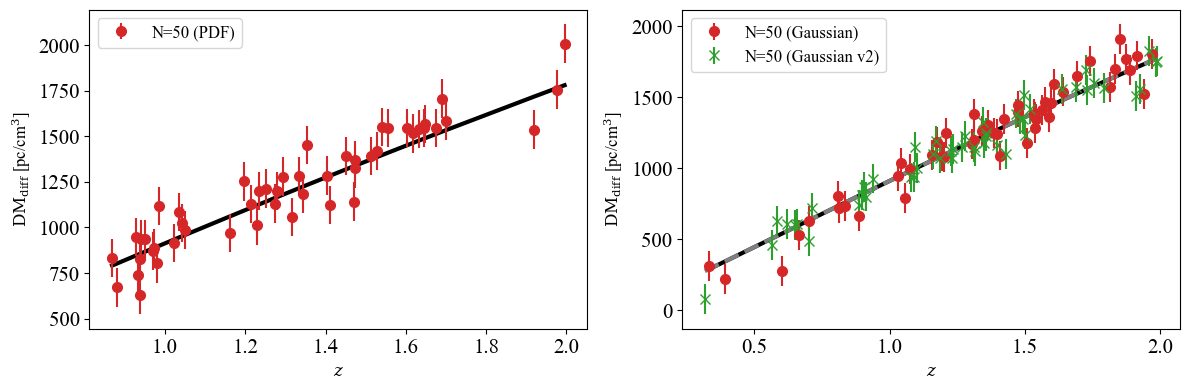

In [21]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(np.sort(z_centres_gauss_highz), np.sort(DM_centres_gauss_highz), c='black', lw=3)
ax1.errorbar(z_centres_gauss_highz, DM_obs_centre_gauss_highz, yerr=s_DM_obs_gauss_highz, marker='o', ls='', ms=7, c='tab:red', label=f'N={N_EVENTS} (PDF)')
ax1.set_ylabel(r'${\rm DM}_{\rm diff}$ [pc/cm$^3$]', fontsize=12)
ax1.set_xlabel(r'$z$', fontsize=12)
ax1.legend(loc='upper left', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2.plot(np.sort(z_centres_gauss), np.sort(DM_centres_gauss), c='black', lw=3)
ax2.plot(np.sort(z_centres_gauss_v2), np.sort(DM_centres_gauss_v2), c='tab:grey', lw=3, ls='--')
ax2.errorbar(z_centres_gauss, DM_obs_centre_gauss, yerr=s_DM_obs_gauss, marker='o', ls='', ms=7, c='tab:red', label=f'N={N_EVENTS} (Gaussian)')
ax2.errorbar(z_centres_gauss_v2, DM_obs_centre_gauss_v2, yerr=s_DM_obs_gauss_v2, marker='x', ls='', ms=7, c='tab:green', label=f'N={N_EVENTS} (Gaussian v2)')
ax2.set_ylabel(r'${\rm DM}_{\rm diff}$ [pc/cm$^3$]', fontsize=12)
ax2.set_xlabel(r'$z$', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
# if SAVE_FIG:
#     plt.savefig("./figures/generate_FRB_events_highz.png", dpi=300, bbox_inches='tight')

plt.show()

## Analyse results

**Corner plot - Gaussian**

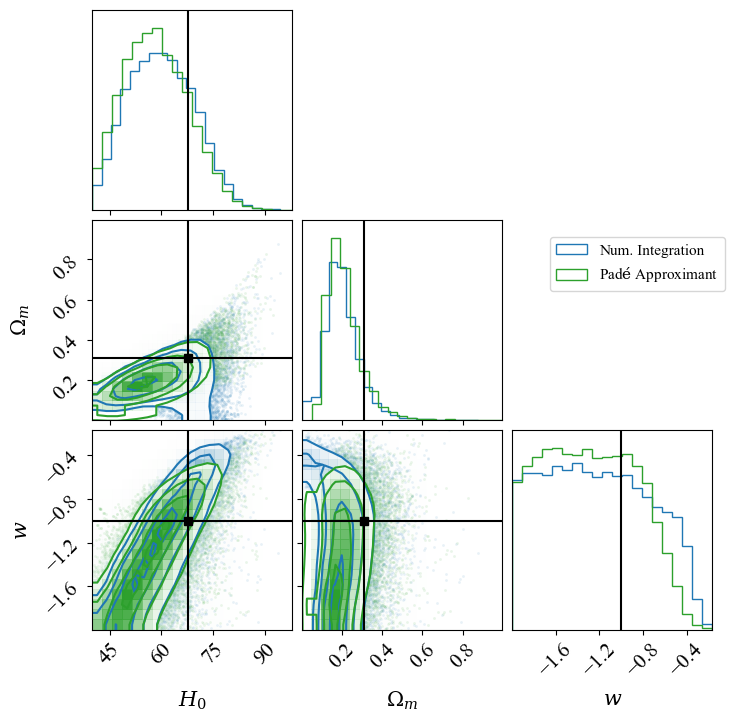

In [11]:
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]

fig = corner.corner(
    flat_samples_gauss, labels=labels, color="tab:blue", smooth=True, label_kwargs={"fontsize": 15},
)
corner.corner(
    flat_samples_PD_gauss, fig=fig, truths=[HUBBLE, OMEGA_MATTER, W_LAMBDA], truth_color='black', color="tab:green", smooth=True
);

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=15)

plt.legend(['Num. Integration', r'Pad$\'{\rm e}$ Approximant'], loc='upper right', bbox_to_anchor=(0.1, 1., 1, 1), fontsize=11)
plt.show()

**Corner plot - PDF**

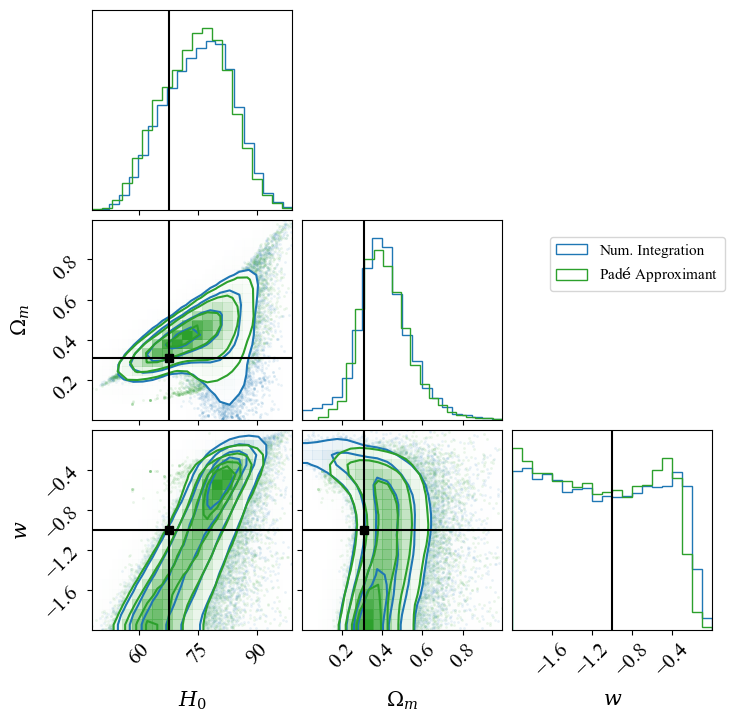

In [12]:
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]

fig = corner.corner(
    flat_samples_pdf, labels=labels, color="tab:blue", smooth=True, label_kwargs={"fontsize": 15},
)
corner.corner(
    flat_samples_PD_pdf, fig=fig, truths=[HUBBLE, OMEGA_MATTER, W_LAMBDA], truth_color='black', color="tab:green", smooth=True
);

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=15)

plt.legend(['Num. Integration', r'Pad$\'{\rm e}$ Approximant'], loc='upper right', bbox_to_anchor=(0.1, 1., 1, 1), fontsize=11)
plt.show()

**Corner plot - Gaussian - high_z**

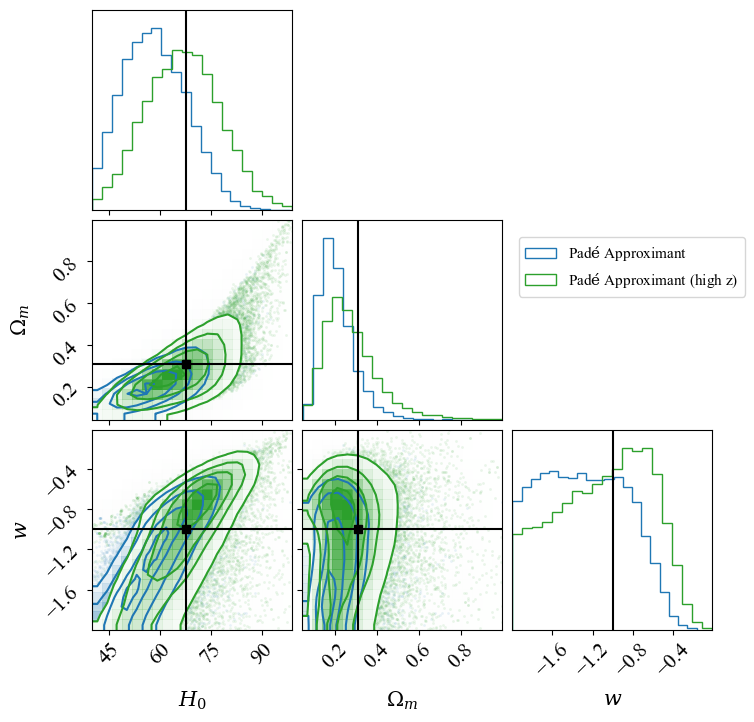

In [14]:
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]

fig = corner.corner(
    flat_samples_PD_gauss, labels=labels, color="tab:blue", smooth=True, label_kwargs={"fontsize": 15},
)
corner.corner(
    flat_samples_PD_gauss_highz, fig=fig, truths=[HUBBLE, OMEGA_MATTER, W_LAMBDA], truth_color='black', color="tab:green", smooth=True
);

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=15)

plt.legend([r'Pad$\'{\rm e}$ Approximant', r'Pad$\'{\rm e}$ Approximant (high z)' ], loc='upper right', bbox_to_anchor=(0.2, 1., 1, 1), fontsize=11)
plt.show()

**Corner plot - Gaussian - Priors**

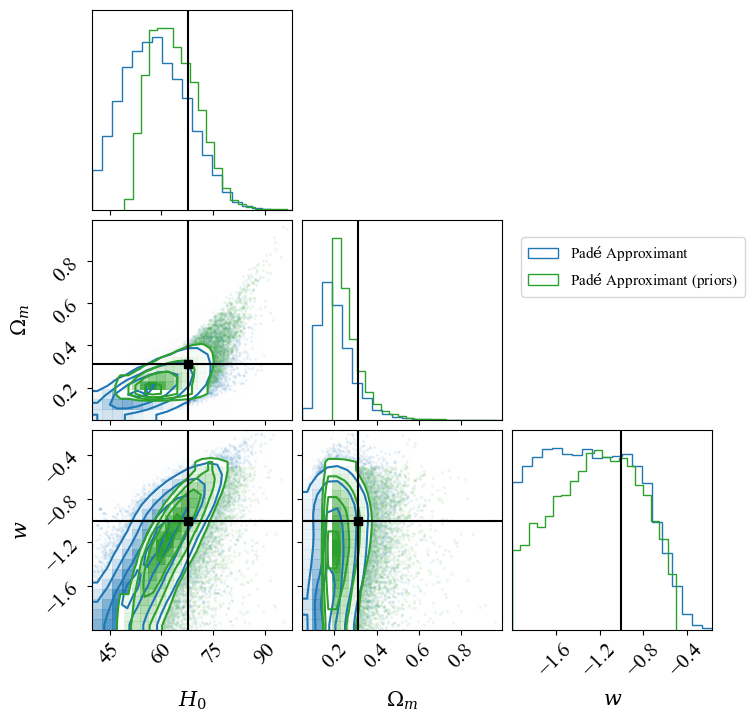

In [15]:
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]

fig = corner.corner(
    flat_samples_PD_gauss, labels=labels, color="tab:blue", smooth=True, label_kwargs={"fontsize": 15},
)
corner.corner(
    flat_samples_PD_prior, fig=fig, truths=[HUBBLE, OMEGA_MATTER, W_LAMBDA], truth_color='black', color="tab:green", smooth=True
);

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=15)

plt.legend([r'Pad$\'{\rm e}$ Approximant', r'Pad$\'{\rm e}$ Approximant (priors)' ], loc='upper right', bbox_to_anchor=(0.2, 1., 1, 1), fontsize=11)
plt.show()

**Corner plot - Gaussian vs PDF Pade**

Different events

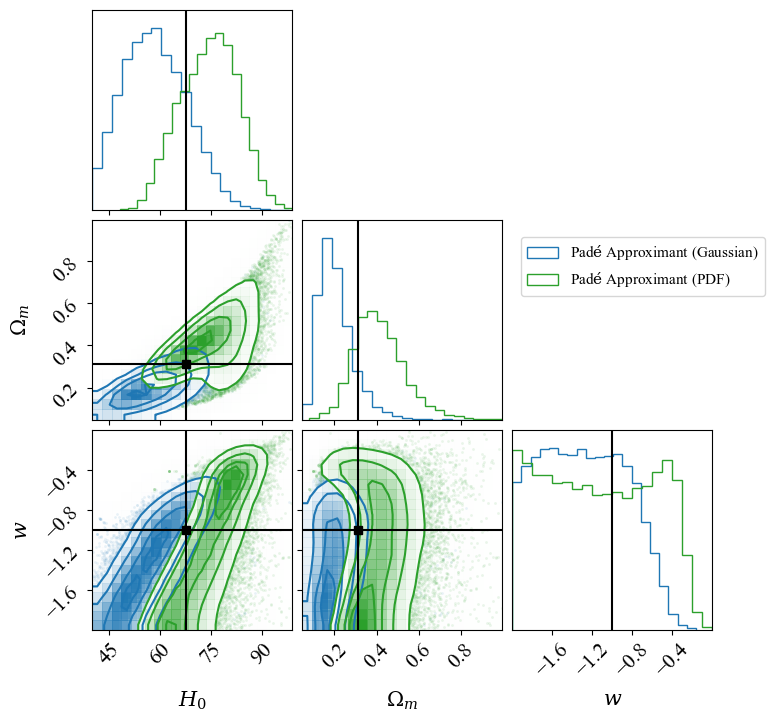

In [17]:
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]

fig = corner.corner(
    flat_samples_PD_gauss, labels=labels, color="tab:blue", smooth=True, label_kwargs={"fontsize": 15},
)
corner.corner(
    flat_samples_PD_pdf, fig=fig, truths=[HUBBLE, OMEGA_MATTER, W_LAMBDA], truth_color='black', color="tab:green", smooth=True
);

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=15)

plt.legend([r'Pad$\'{\rm e}$ Approximant (Gaussian)', r'Pad$\'{\rm e}$ Approximant (PDF)' ], loc='upper right', bbox_to_anchor=(0.3, 1., 1, 1), fontsize=11)
plt.show()

**Corner plot - Gaussian vs PDF Pade**

Same events, from PDF generation, analysed with different methods

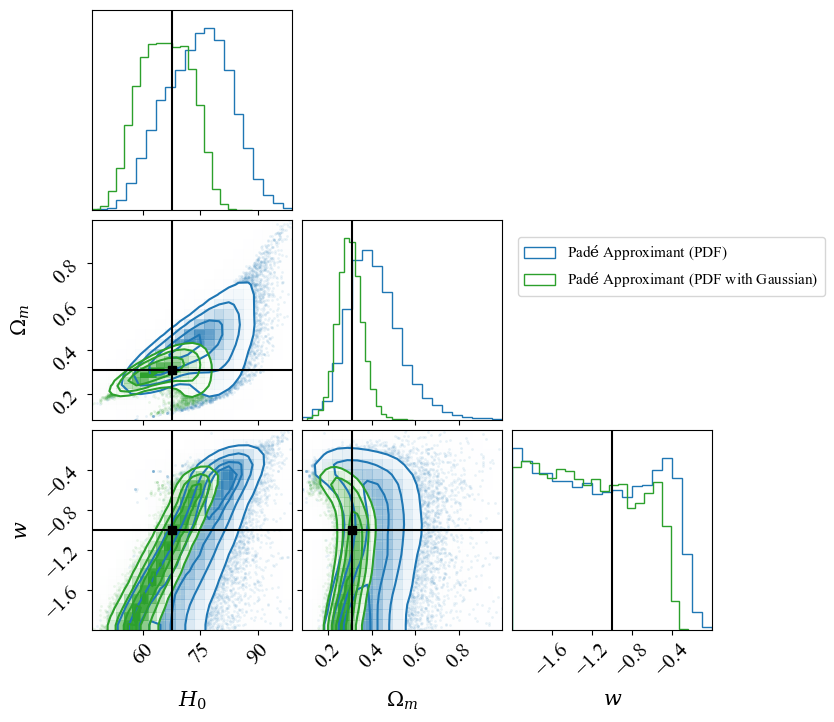

In [11]:
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]

fig = corner.corner(
    flat_samples_PD_pdf, labels=labels, color="tab:blue", smooth=True, label_kwargs={"fontsize": 15},
)
corner.corner(
    flat_samples_PD_pdf_gauss, fig=fig, truths=[HUBBLE, OMEGA_MATTER, W_LAMBDA], truth_color='black', color="tab:green", smooth=True
);

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=15)

plt.legend([r'Pad$\'{\rm e}$ Approximant (PDF)', r'Pad$\'{\rm e}$ Approximant (PDF with Gaussian)' ], loc='upper right', bbox_to_anchor=(0.6, 1., 1, 1), fontsize=11)
plt.show()

Same events, from Gaussian generation, analysed with different methods

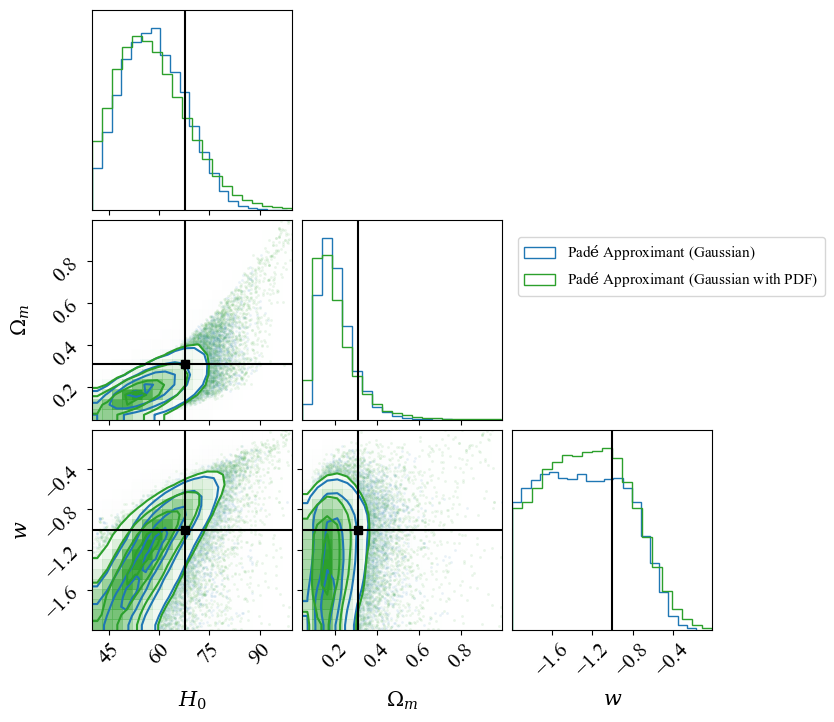

In [12]:
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]

fig = corner.corner(
    flat_samples_PD_gauss, labels=labels, color="tab:blue", smooth=True, label_kwargs={"fontsize": 15},
)
corner.corner(
    flat_samples_PD_gauss_pdf, fig=fig, truths=[HUBBLE, OMEGA_MATTER, W_LAMBDA], truth_color='black', color="tab:green", smooth=True
);

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=15)

plt.legend([r'Pad$\'{\rm e}$ Approximant (Gaussian)', r'Pad$\'{\rm e}$ Approximant (Gaussian with PDF)' ], loc='upper right', bbox_to_anchor=(0.6, 1., 1, 1), fontsize=11)
plt.show()

**Corner plot - Gaussian - events check**

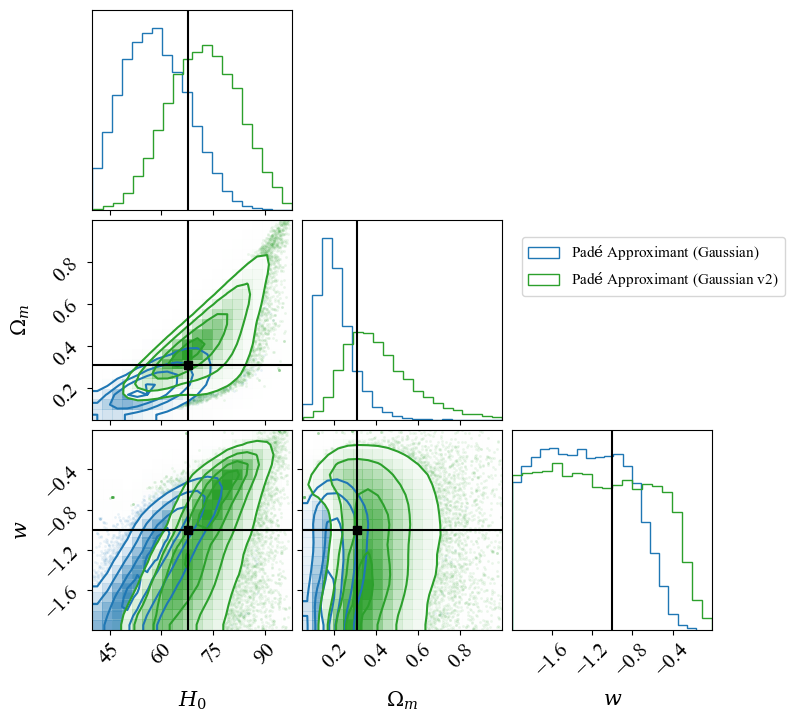

In [13]:
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]

fig = corner.corner(
    flat_samples_PD_gauss, labels=labels, color="tab:blue", smooth=True, label_kwargs={"fontsize": 15},
)
corner.corner(
    flat_samples_PD_gauss_v2, fig=fig, truths=[HUBBLE, OMEGA_MATTER, W_LAMBDA], truth_color='black', color="tab:green", smooth=True
);

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=15)

plt.legend([r'Pad$\'{\rm e}$ Approximant (Gaussian)', r'Pad$\'{\rm e}$ Approximant (Gaussian v2)' ], loc='upper right', bbox_to_anchor=(0.4, 1., 1, 1), fontsize=11)
plt.show()

**Corner plot - Garbadge events**

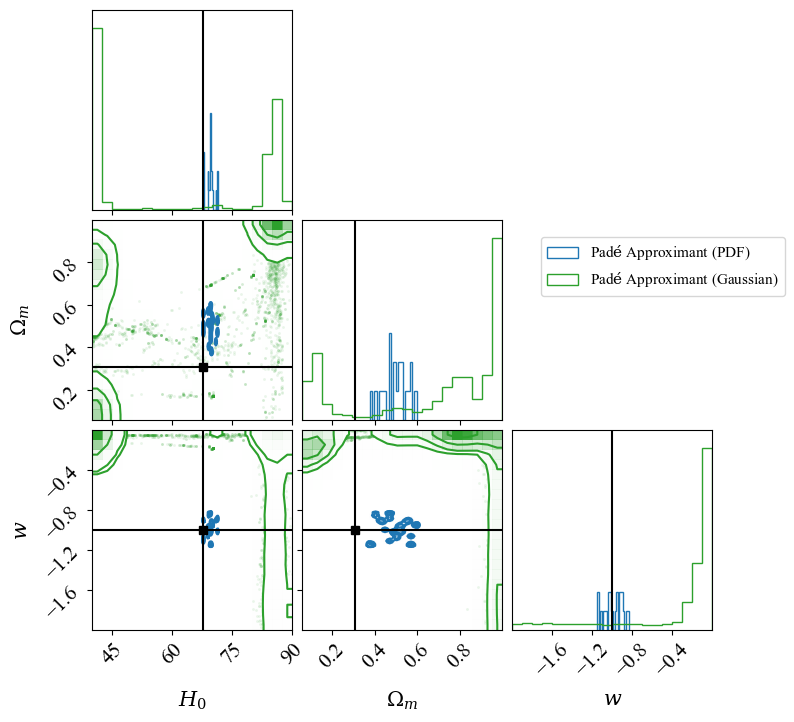

In [14]:
labels = [r"$H_0$", r"$\Omega_m$", r"$w$"]

fig = corner.corner(
    flat_samples_PD_garbadge_pdf, labels=labels, color="tab:blue", smooth=True, label_kwargs={"fontsize": 15},
)
corner.corner(
    flat_samples_PD_garbadge_gauss, fig=fig, truths=[HUBBLE, OMEGA_MATTER, W_LAMBDA], truth_color='black', color="tab:green", smooth=True
);

for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=15)

plt.legend([r'Pad$\'{\rm e}$ Approximant (PDF)', r'Pad$\'{\rm e}$ Approximant (Gaussian)' ], loc='upper right', bbox_to_anchor=(0.4, 1., 1, 1), fontsize=11)
plt.show()

-----------------------------------------------------------------------------